## Computer Hardware Data Set 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./machine.data', header=None)
df.columns = ['vendor', 'model', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax',
             'prp', 'erp']

In [3]:
df.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
df.isnull().sum()

vendor    0
model     0
myct      0
mmin      0
mmax      0
cach      0
chmin     0
chmax     0
prp       0
erp       0
dtype: int64

In [5]:
# Checking no. of unique value per feature, if nunique <= 1, drop feature
df.nunique()

vendor     30
model     209
myct       60
mmin       25
mmax       23
cach       22
chmin      15
chmax      31
prp       116
erp       104
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor    209 non-null object
model     209 non-null object
myct      209 non-null int64
mmin      209 non-null int64
mmax      209 non-null int64
cach      209 non-null int64
chmin     209 non-null int64
chmax     209 non-null int64
prp       209 non-null int64
erp       209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [7]:
df['vendor'].value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
amdahl           9
cdc              9
burroughs        8
hp               7
dg               7
harris           7
ipl              6
magnuson         6
c.r.d            6
dec              6
formation        5
cambex           5
prime            5
gould            3
perkin-elmer     3
nixdorf          3
bti              2
wang             2
basf             2
apollo           2
microdata        1
sratus           1
four-phase       1
adviser          1
Name: vendor, dtype: int64

In [8]:
df.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


Text(0.5,1,'Correlation Matrix')

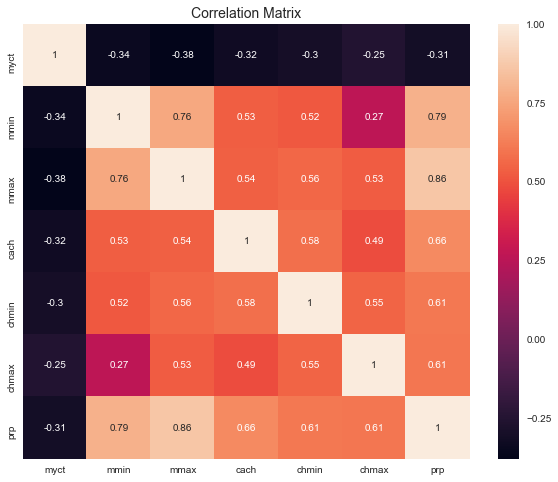

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

plt.figure(figsize=(10, 8))
# here we excluded erp, as it's the estimated relative performance values estimated by other authors
sns.heatmap(df[['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp']].corr(), annot=True)
plt.title('Correlation Matrix', fontsize=14)

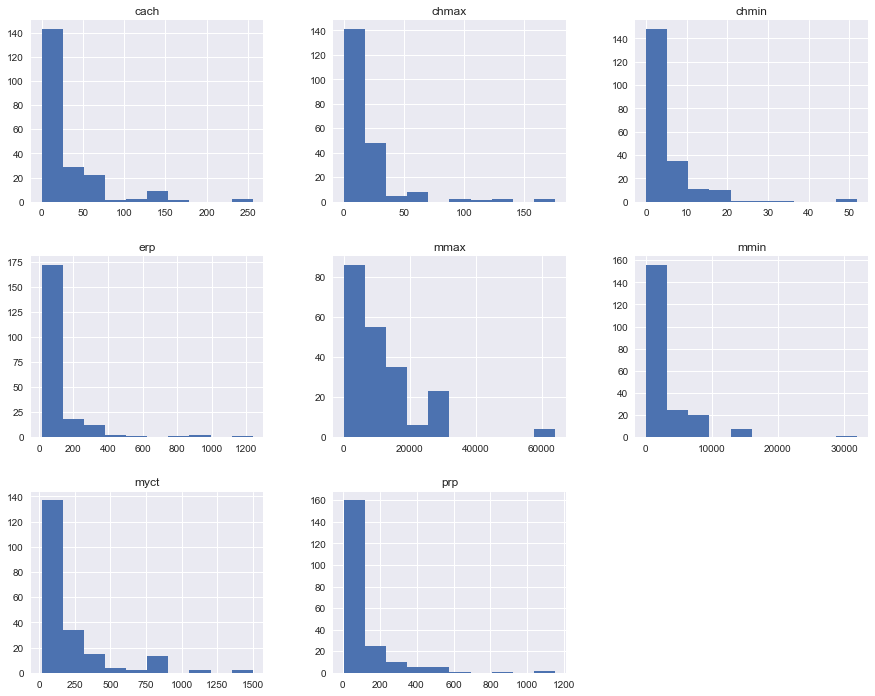

In [10]:
# Since the dimensions are small lets do a pairplot and visualise their distribution

df.hist()
fig = plt.gcf()
fig.set_size_inches(15, 12)
plt.show()

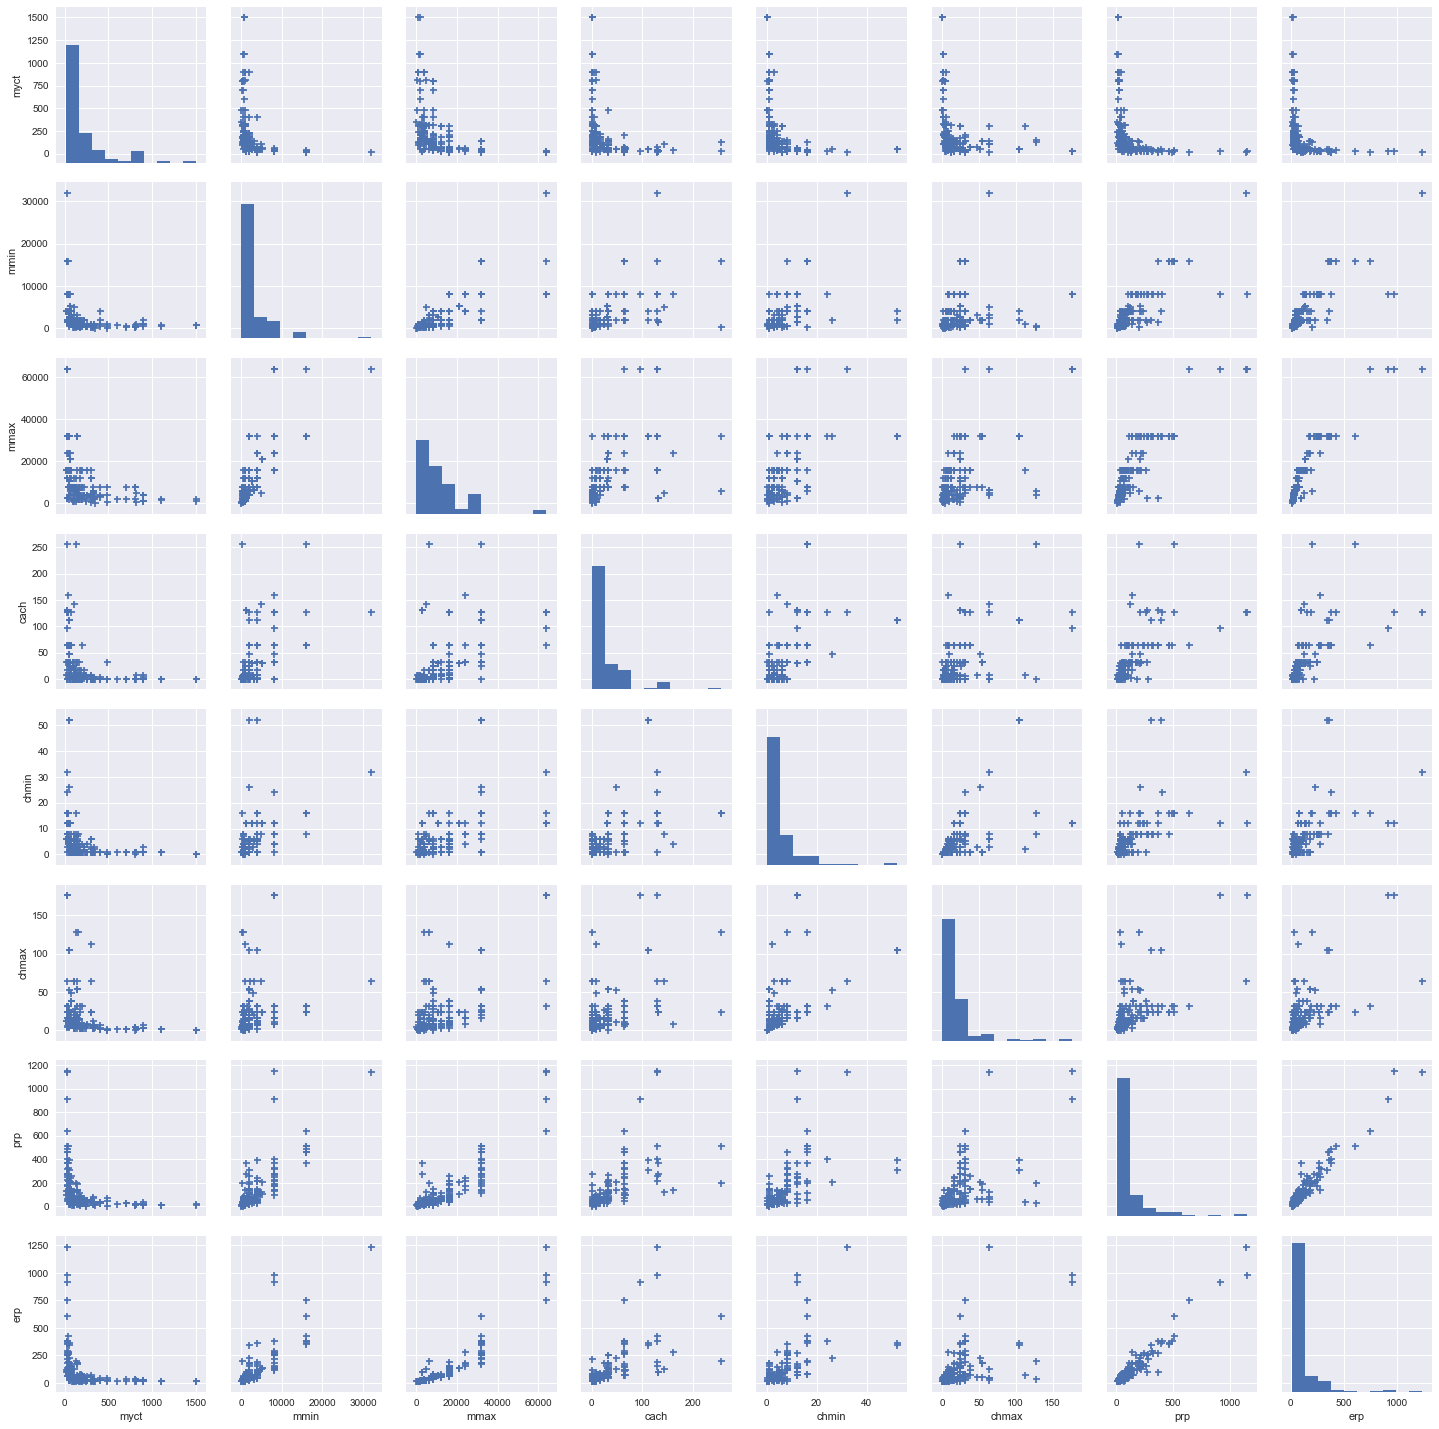

In [11]:
pairplot = sns.pairplot(df, markers='+')
plt.show()

In [12]:
d_vendor = pd.get_dummies(df['vendor'], prefix='vdr', drop_first=True)

In [13]:
# Let's exclude vendor and model for now as they contained 30 and 209 values respectively,
# It is huge if we want to one-hot encode these two.
# According to data description, we will only use these 6 numeric predictors
X = df[['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax']]
y = df['prp']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # stratify=y if there are more than 1 count of the same values for the respond feature

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)

print('\nLinear Regression - Train accuracy: ', r2_score(y_train, pred))

pred = lr.predict(X_test)
print('\nLinear Regression - Test accuracy: ', r2_score(y_test, pred))



Linear Regression - Train accuracy:  0.8704518031959315

Linear Regression - Test accuracy:  0.7382076147408105


In [16]:
from sklearn.linear_model import Ridge

alphas = [1e-4, 1e-3, 1e-2, -.1, -.5, 1.0, 5.0, 10.0]
init_rsqrd = 0
print('Ridge Regression: Best Parameters')
for i in alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
        
    tr_rsqrd = r2_score(y_train, rr.predict(X_train)) # train
    ts_rsqrd = r2_score(y_test, rr.predict(X_test)) # test
    
    # alternative
    # tr_rsqrd = rr.score(X_train, y_train) # train
    # ts_rsqrd = rr.score(X_test, y_test) # test

    
    if ts_rsqrd > init_rsqrd: 
        print('Lambda: ', i, ' Train R-Squared value:', round(tr_rsqrd, 5),
             'Test R-squared value:', round(ts_rsqrd, 5))
        init_rsqrd = ts_rsqrd

Ridge Regression: Best Parameters
Lambda:  0.0001  Train R-Squared value: 0.87045 Test R-squared value: 0.73821
Lambda:  0.001  Train R-Squared value: 0.87045 Test R-squared value: 0.73821
Lambda:  0.01  Train R-Squared value: 0.87045 Test R-squared value: 0.73821
Lambda:  1.0  Train R-Squared value: 0.87045 Test R-squared value: 0.73823
Lambda:  5.0  Train R-Squared value: 0.87045 Test R-squared value: 0.73832
Lambda:  10.0  Train R-Squared value: 0.87045 Test R-squared value: 0.73843


In [17]:
from sklearn.linear_model import Lasso
# Simple grid search to evaluate the alphas for lasso regression
alphas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]
init_rsqrd = 0
print("Lasso Regression: Best Parameters")

for i in alphas:
    lasso_reg = Lasso(alpha=i)
    lasso_reg.fit(X_train, y_train)
    tr_rsqrd = lasso_reg.score(X_train, y_train)
    ts_rsqrd = lasso_reg.score(X_test, y_test)
    
    if ts_rsqrd > init_rsqrd:
        print("Lambda: ", i, "Train R-Squared value:", round(tr_rsqrd, 5),
             "Test R-squared value:", round(ts_rsqrd, 5))
        init_rsqrd = ts_rsqrd

Lasso Regression: Best Parameters
Lambda:  0.0001 Train R-Squared value: 0.87045 Test R-squared value: 0.73821
Lambda:  0.001 Train R-Squared value: 0.87045 Test R-squared value: 0.73821
Lambda:  0.01 Train R-Squared value: 0.87045 Test R-squared value: 0.73821
Lambda:  0.1 Train R-Squared value: 0.87045 Test R-squared value: 0.73826
Lambda:  0.5 Train R-Squared value: 0.87045 Test R-squared value: 0.73848
Lambda:  1.0 Train R-Squared value: 0.87045 Test R-squared value: 0.73874
Lambda:  5.0 Train R-Squared value: 0.87034 Test R-squared value: 0.74083
Lambda:  10.0 Train R-Squared value: 0.87002 Test R-squared value: 0.74336


Looks like lasso reg yields slightly better r2

In [18]:
df.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [19]:
# Fitting on all training instances
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

print('\nLinear Regression - Train accuracy: ', r2_score(y, pred))


Linear Regression - Train accuracy:  0.8648906922768672


In [20]:
r2_score(pred, df['prp']) # r2_score increased from .84 to .89 after adding vendor as features

0.8437845279991962

In [21]:
rr = Ridge(alpha=0.0001)
rr.fit(X, y)
r2_score(pred, df['prp'])

#Ridge Regression: Best Parameters
#Lambda:  0.0001  Train R-Squared value: 0.89861 Test R-squared value: 0.75432
#Lambda:  -0.5  Train R-Squared value: 0.87556 Test R-squared value: 0.80894

0.8437845279991962

Looks like the best r2 is only 84.3% when fitted on all training instances using Linear Regerssion 

Let's include the vendor name as a feature and sees if the square errors reduces

In [22]:
numeric_cols = ['myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax']
X = pd.concat([df[numeric_cols], d_vendor], axis=1)
y = df['prp']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # stratify=y if there are more than 1 count of the same values for the respond feature

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
print('\nLinear Regression - Train accuracy: ', r2_score(y_train, pred))

pred = lr.predict(X_test)
print('\nLinear Regression - Test accuracy: ', r2_score(y_test, pred))


Linear Regression - Train accuracy:  0.8986125721399391

Linear Regression - Test accuracy:  0.7545321019151943


Here we get slightly better r2 with test accuracy from 0.7382 to 0.7545

Let's try on ridge and lasso regression

In [25]:
from sklearn.linear_model import Ridge

alphas = [1e-4, 1e-3, 1e-2, -.1, -.5, 1.0, 5.0, 10.0]
init_rsqrd = 0
print('Ridge Regression: Best Parameters')
for i in alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
        
    tr_rsqrd = r2_score(y_train, rr.predict(X_train)) # train
    ts_rsqrd = r2_score(y_test, rr.predict(X_test)) # test
    
    # alternative
    # tr_rsqrd = rr.score(X_train, y_train) # train
    # ts_rsqrd = rr.score(X_test, y_test) # test

    
    if ts_rsqrd > init_rsqrd: 
        print('Lambda: ', i, ' Train R-Squared value:', round(tr_rsqrd, 5),
             'Test R-squared value:', round(ts_rsqrd, 5))
        init_rsqrd = ts_rsqrd

Ridge Regression: Best Parameters
Lambda:  0.0001  Train R-Squared value: 0.89861 Test R-squared value: 0.75432
Lambda:  -0.5  Train R-Squared value: 0.87556 Test R-squared value: 0.80894


In [26]:
from sklearn.linear_model import Lasso
# Simple grid search to evaluate the alphas for lasso regression
alphas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1.0, 5.0, 10.0]
init_rsqrd = 0
print("Lasso Regression: Best Parameters")

for i in alphas:
    lasso_reg = Lasso(alpha=i, max_iter=5000)
    lasso_reg.fit(X_train, y_train)
    tr_rsqrd = lasso_reg.score(X_train, y_train)
    ts_rsqrd = lasso_reg.score(X_test, y_test)
    
    if ts_rsqrd > init_rsqrd:
        print("Lambda: ", i, "Train R-Squared value:", round(tr_rsqrd, 5),
             "Test R-squared value:", round(ts_rsqrd, 5))
        init_rsqrd = ts_rsqrd

Lasso Regression: Best Parameters
Lambda:  0.0001 Train R-Squared value: 0.89861 Test R-squared value: 0.75428


Given the above test, we see that ridge regression gives better test r2 of 0.8089 with the feature 'vendor'.

Fitting on all training instances using Linear Regression with the feature 'vendor'.

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)
print('\nLinear Regression - on all instances', round(r2_score(y, pred), 5))


Linear Regression - on all instances 0.90332


We got a much better r2 of 0.9033 when fitted on all training instances with the feature 'vendor'

Let's use the alpha we've found when trained on lasso and ridge regression with the best test accuracy.

Ridge Regression: Best Parameters (with feature "vendor")
-  Lambda:  -0.5  Train R-Squared value: 0.87556 Test R-squared value: 0.80894

Lasso Regression: Best Parameters
-  Lambda:  0.0001 Train R-Squared value: 0.89861 Test R-squared value: 0.75401

In [28]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

rr = Ridge(alpha=-.5, max_iter=5000)
rr.fit(X, y)
pred = rr.predict(X)
print('\nRidge Regression - on all instances', round(r2_score(y, pred), 5))

ls = Lasso(alpha=0.0001, max_iter=5000)
ls.fit(X, y)
pred = ls.predict(X)
print('\nLasso Regression - on all instances', round(r2_score(y, pred), 5))


Ridge Regression - on all instances 0.86829

Lasso Regression - on all instances 0.90332


Looks like 90.33% is our best r2 obtained from either Linear Regression or Lasso Regression.

In [29]:
# analysis of our predicted relative performance against our actual published relative performance
# erp is the estimated relative performance by other authors
pd.DataFrame({'predicted': pred, 'prp': df['prp'], 'erp': df['erp']})[:10]

,erp,predicted,prp
0,199,198.606137,198
1,253,278.172817,269
2,253,278.172817,220
3,253,278.172817,172
4,132,180.652326,132
5,290,300.973465,318
6,381,445.574396,367
7,381,445.574396,489
8,749,563.941732,636
9,1238,975.744329,1144


In [30]:
# dataset from: https://archive.ics.uci.edu/ml/datasets/Computer+Hardware